<a href="https://colab.research.google.com/github/jawahar273/datalift/blob/master/Visualization_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travel Reviews

So many people like to know more about place around them. In this *modern digital era*  know about a place may easy but also mean there 
specific time period or condition you must avoid those place at all cost. 

For example: Going(Assume only) to the **Antractica** on the time of winter, do you like to go around the place? No.



In [0]:
!pip install bokeh

## DataSet Source

Data set are Crawling of TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Dataset [link](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews#)

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tripadvisor_review.csv to tripadvisor_review (2).csv
User uploaded file "tripadvisor_review.csv" with length 57307 bytes


In [0]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

%matplotlib inline

Loading BokehJS ...

## Dataset Attribute Description


1. Unique user id 
2. Average user feedback on art galleries 
3. Average user feedback on dance clubs 
4. Average user feedback on juice bars 
5. Average user feedback on restaurants 
6. Average user feedback on museums 
7. Average user feedback on resorts 
8. Average user feedback on parks/picnic spots 
9. Average user feedback on beaches 
10. Average user feedback on theaters 
11.  Average user feedback on religious institutions



### Loading into Memory


In [0]:
travel = pd.read_csv('tripadvisor_review.csv')
travel.columns = [
    'user_id',
    'art_galleries',
    'dance_clubs',
    'juice_bars',
    'restaurants',
    'museums',
    'resorts',
    'parks',
    'beaches',
    'theaters',
    'religious_institutions'
]

getting the basic information such as data type of the attributes. 

In [0]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
user_id                   980 non-null object
art_galleries             980 non-null float64
dance_clubs               980 non-null float64
juice_bars                980 non-null float64
restaurants               980 non-null float64
museums                   980 non-null float64
resorts                   980 non-null float64
parks                     980 non-null float64
beaches                   980 non-null float64
theaters                  980 non-null float64
religious_institutions    980 non-null float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [0]:
travel.describe()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


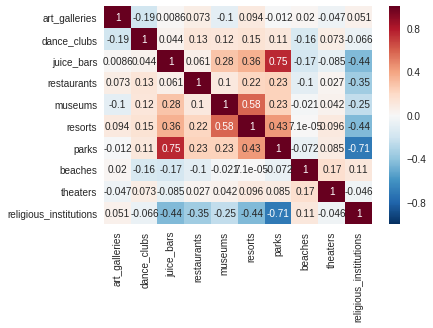

In [0]:
sns.heatmap(travel.corr(), annot=True)
plt.show()

### Conclusion on HeatMap



1.   **Parks** and **Juice Bar** show high correlation ship(may due to the fact the parks and juice bar are located nearby for the tourist in a confort way)
2.   **Art galleries **and **museums** show little negative correlation.
3. **Resort** and **Beaches** are highly negative correlation(the present of resort is dense than beaches)


Even through the each columns look independent, those columns are dependent on each based on some such geo location, season period etc.

In [0]:
x = travel.drop('user_id',axis=1)

# Cluster Users 

Even through lot of information is required to make recommencation or prediction. By clustering user we can certain step for finding why the user make these rating.

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
def show_circle(x, y, _circle={}):
 
  fig1 = figure()
  fig1.circle(x, y, **_circle)
  output_notebook()

  show(fig1)

def show_circle_kmean(x, y, _circle={}):
 
  fig1 = figure()
  centers = _circle.get('centers')
  del _circle['centers']
  fig1.circle(x, y, **_circle)
  c1 = np.mean(centers[0])
  c2 = np.mean(centers[1])
  fig1.circle(c1, c2, color= "#FB8072", size=20)
    
  output_notebook()

  show(fig1)

In [0]:
x1 = principalDf['principal component 1']
x2 = principalDf['principal component 2']

In [0]:
show_circle(x1, x2)

Loading BokehJS ...

In [0]:

from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=2)
# Kmean.fit(x)

In [0]:
KmeanComponent = Kmean.fit_transform(x)
KmeanDf = pd.DataFrame(data=KmeanComponent, columns = ['Kmean component 1', 'Kmean component 2'])

In [0]:
k1 = KmeanDf['Kmean component 1']
k2 = KmeanDf['Kmean component 2']

array([[0.90599476, 1.41947644, 1.82939791, 0.58280105, 1.18      ,
        2.18356021, 3.1871466 , 2.80489529, 1.52609948, 2.60157068],
       [0.88501672, 1.30989967, 0.49198997, 0.50036789, 0.78625418,
        1.62528428, 3.17697324, 2.8543311 , 1.59712375, 2.92548495]])

In [0]:
show_circle_kmean(k1, k2, _circle={'centers': Kmean.cluster_centers_})

Loading BokehJS ...

# References:



*   https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


